In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
import pylab as plt
import math
import time

# オイラー法を用いて非等温反応式を解く

---

r=kCaCb  
k=k0exp(-E/RT)  

熱が変化することで反応速度は連続的に変化するので解析的に解けない  
物質収支と熱収支を連立することで反応率と温度の時間変化を算出する

---

まず
dx/dt=k/(x+c)  
を解いてみる

## オイラー法の計算過程を関数として定義する
---
今回は反応率x_end*100 [%]になった時点で終了とする

In [48]:
def eular_cal(x,x_end,t,step):
    #微分方程式
    #func=k/c/(x+1)
    #パラメーターの入力
    k=2
    c=10
    
    #出力用の配列を用意
    t_array=np.array([t])
    x_array=np.array([x])
    
    #計算回数
    n=0
    
    while(x<x_end):
        func=k/c/(x+1)
        
        t=t+step
        x=x+func*step
        
        x_array=np.append(x_array,[x])
        t_array=np.append(t_array,[t])
        
        n+=1
    
    return n,t_array,x_array

In [90]:
#パラメーターを入力する

x=0
x_end=0.99
t=0

step=0.1

cal_data=eular_cal(x,x_end,t,step)

#計算回数を表示する
print(cal_data[0])

74


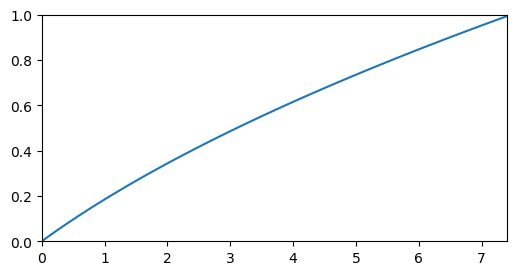

In [88]:
t_change=cal_data[1]
x_change=cal_data[2]

plt.figure(figsize=(6,3),dpi=100,facecolor='w', edgecolor='k')
plt.axis([0,max(t_change),0,1])
plt.plot(t_change, x_change)
plt.show()

## 解析解と比較してみる

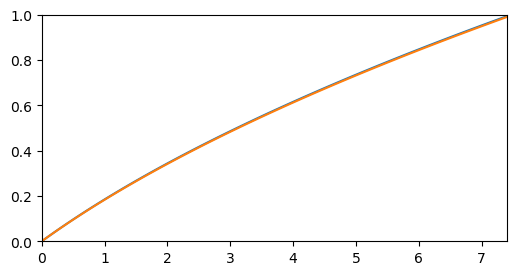

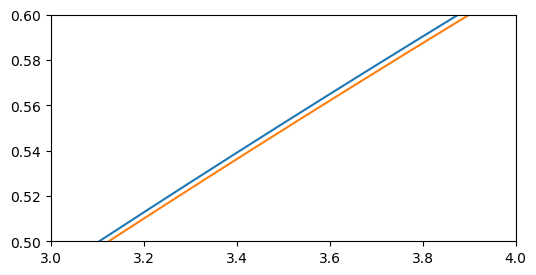

In [92]:
t_change=cal_data[1]
x_change=cal_data[2]

t_theo=np.linspace(0,10,100)
x_theo=[math.sqrt(1+2/5*t_theo[i])-1 for i in range(100)]

plt.figure(figsize=(6,3),dpi=100,facecolor='w', edgecolor='k')
plt.axis([0,max(t_change),0,1])
plt.plot(t_change, x_change)
plt.plot(t_theo, x_theo)

plt.figure(figsize=(6,3),dpi=100,facecolor='w', edgecolor='k')
plt.axis([3,4,0.5,0.6])
plt.plot(t_change, x_change)
plt.plot(t_theo, x_theo)
plt.show()

上の方程式ではstep=0.1 s程度で十分に安定した数値計算となることがわかる。

---
# <font color="Red"> 実際の問題 </font>
---
